In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
import statsmodels.formula.api as smf

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,mean_squared_error, mean_absolute_error
from sklearn.pipeline import Pipeline

In [2]:
# load data

df_ = pd.read_csv("Fish.csv")

In [3]:
# copy df_

df = df_.copy()

In [4]:
# type of variables

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [5]:
# Describe min,max,mean,median of variables

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Weight,159.0,398.326415,357.978317,0.0000,120.00000,273.0000,650.0000,1650.000
Length1,159.0,26.247170,9.996441,7.5000,19.05000,25.2000,32.7000,59.000
Length2,159.0,28.415723,10.716328,8.4000,21.00000,27.3000,35.5000,63.400
Length3,159.0,31.227044,11.610246,8.8000,23.15000,29.4000,39.6500,68.000
Height,159.0,8.970994,4.286208,1.7284,5.94480,7.7860,12.3659,18.957
Width,159.0,4.417486,1.685804,1.0476,3.38565,4.2485,5.5845,8.142


In [6]:
# Species and counts

sp = df['Species'].value_counts()
sp = pd.DataFrame(sp)
sp.T

,Perch,Bream,Roach,Pike,Smelt,Parkki,Whitefish
Species,56,35,20,17,14,11,6


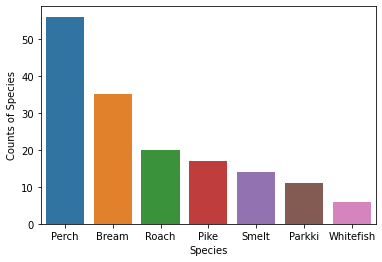

In [7]:
# Bar Graph of Species 

sns.barplot(x=sp.index, y=sp['Species']);
plt.xlabel('Species')
plt.ylabel('Counts of Species')
plt.show()

In [8]:
# is there null value?

df.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [9]:
# rename the columns

df = df.rename(columns={"Length1": "Vertical_Len", "Length2": "Diagonal_Len", "Length3": "Cross_Len"})

In [10]:
df.head()

,Species,Weight,Vertical_Len,Diagonal_Len,Cross_Len,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


<Figure size 1080x432 with 0 Axes>

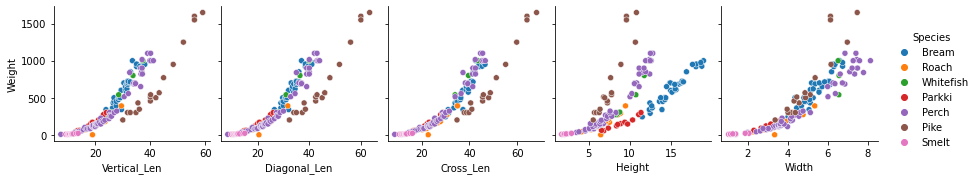

In [11]:
# Analyses of Weight

plt.figure(figsize=(15,6))
sns.pairplot(data= df,
             x_vars = ['Vertical_Len','Diagonal_Len','Cross_Len','Height','Width'],
             y_vars = 'Weight', 
             hue = 'Species')
plt.show()

In [12]:
# Correlation of the variables

df.corr()

,Weight,Vertical_Len,Diagonal_Len,Cross_Len,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Vertical_Len,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Diagonal_Len,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Cross_Len,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


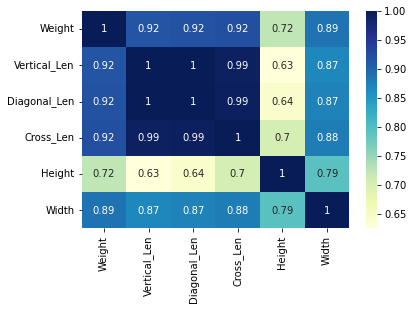

In [13]:
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu');

<Figure size 1080x432 with 0 Axes>

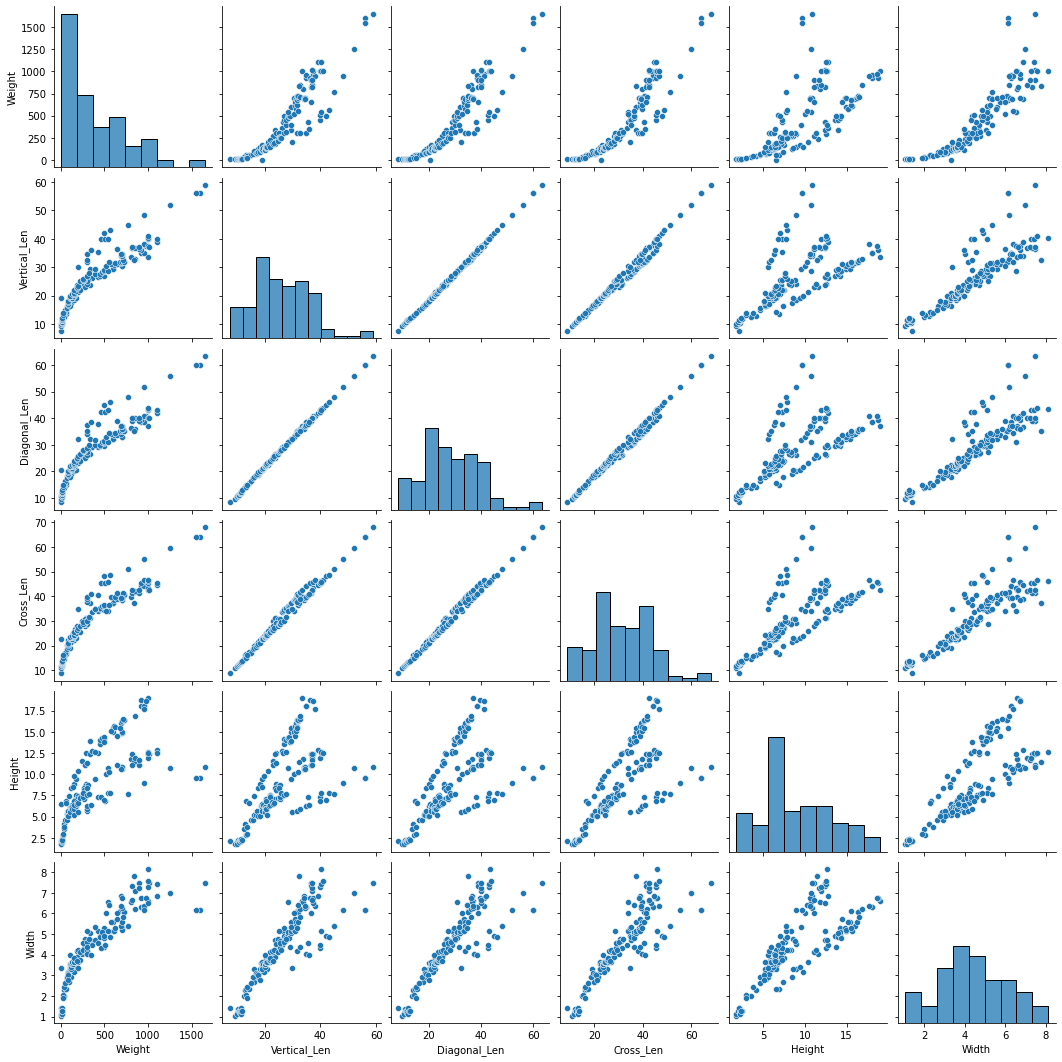

In [14]:
# lets check distribution of data
plt.figure(figsize=(15,6))
sns.pairplot(data= df)
plt.show()

In [13]:
# Num and cat columns

num_cols = df.select_dtypes(include="number").columns
cat_cols = df.select_dtypes(include="object").columns

In [57]:
num_cols

Index(['Weight', 'Vertical_Len', 'Diagonal_Len', 'Cross_Len', 'Height',
       'Width'],
      dtype='object')

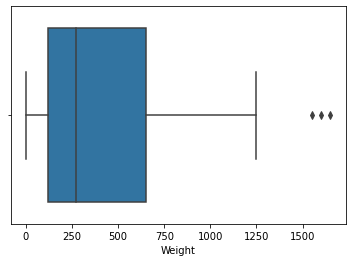

In [15]:
# Analysing and dealing with Outliers
sns.boxplot(x=df['Weight']);

In [16]:
dfw = df['Weight']
dfw_Q1 = dfw.quantile(0.25)
dfw_Q3 = dfw.quantile(0.75)
dfw_IQR = dfw_Q3 - dfw_Q1
dfw_lowerend = dfw_Q1 - (1.5 * dfw_IQR)
dfw_upperend = dfw_Q3 + (1.5 * dfw_IQR)

In [17]:
dfw_outliers = dfw[(dfw < dfw_lowerend) | (dfw > dfw_upperend)]
dfw_outliers

142    1600.0
143    1550.0
144    1650.0
Name: Weight, dtype: float64

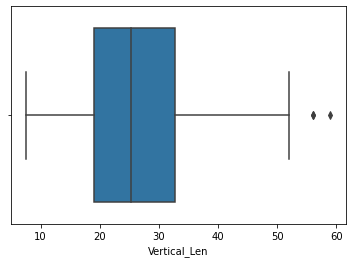

In [18]:
sns.boxplot(x=df['Vertical_Len']);

In [19]:
dflv = df['Vertical_Len']
dflv_Q1 = dflv.quantile(0.25)
dflv_Q3 = dflv.quantile(0.75)
dflv_IQR = dflv_Q3 - dflv_Q1
dflv_lowerend = dflv_Q1 - (1.5 * dflv_IQR)
dflv_upperend = dflv_Q3 + (1.5 * dflv_IQR)

dflv_outliers = dflv[(dflv < dflv_lowerend) | (dflv > dflv_upperend)]
dflv_outliers

142    56.0
143    56.0
144    59.0
Name: Vertical_Len, dtype: float64

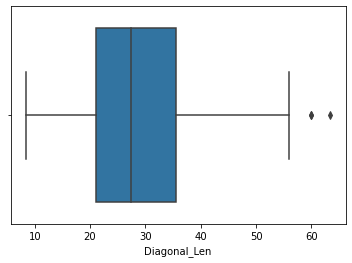

In [20]:
sns.boxplot(x=df['Diagonal_Len']);

In [21]:
dfdia = df['Diagonal_Len']
dfdia_Q1 = dfdia.quantile(0.25)
dfdia_Q3 = dfdia.quantile(0.75)
dfdia_IQR = dfdia_Q3 - dfdia_Q1
dfdia_lowerend = dfdia_Q1 - (1.5 * dfdia_IQR)
dfdia_upperend = dfdia_Q3 + (1.5 * dfdia_IQR)

dfdia_outliers = dfdia[(dfdia < dfdia_lowerend) | (dfdia > dfdia_upperend)]
dfdia_outliers

142    60.0
143    60.0
144    63.4
Name: Diagonal_Len, dtype: float64

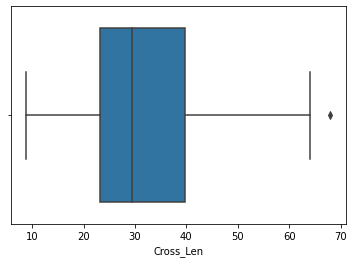

In [22]:
sns.boxplot(x=df['Cross_Len']);

In [23]:
dfcro = df['Cross_Len']
dfcro_Q1 = dfcro.quantile(0.25)
dfcro_Q3 = dfcro.quantile(0.75)
dfcro_IQR = dfcro_Q3 - dfcro_Q1
dfcro_lowerend = dfcro_Q1 - (1.5 * dfcro_IQR)
dfcro_upperend = dfcro_Q3 + (1.5 * dfcro_IQR)

dfcro_outliers = dfcro[(dfcro < dfcro_lowerend) | (dfcro > dfcro_upperend)]
dfcro_outliers

144    68.0
Name: Cross_Len, dtype: float64

In [24]:
df[142:145]

,Species,Weight,Vertical_Len,Diagonal_Len,Cross_Len,Height,Width
142,Pike,1600.0,56.0,60.0,64.0,9.600,6.144
143,Pike,1550.0,56.0,60.0,64.0,9.600,6.144
144,Pike,1650.0,59.0,63.4,68.0,10.812,7.480


In [30]:
df = df.drop([142,143,144])
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Weight,156.0,375.217308,319.546978,0.0000,120.000000,271.0000,612.500000,1250.000
Vertical_Len,156.0,25.655769,9.119630,7.5000,19.000000,25.0000,32.125000,52.000
Diagonal_Len,156.0,27.786538,9.792651,8.4000,21.000000,26.7500,35.000000,56.000
Cross_Len,156.0,30.571154,10.695359,8.8000,23.025000,29.2500,39.425000,59.700
Height,156.0,8.951128,4.324325,1.7284,5.931675,7.6478,12.378550,18.957
Width,156.0,4.375719,1.672188,1.0476,3.369600,4.2433,5.424375,8.142


In [31]:
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state =100)

In [32]:
df_train.shape

(109, 7)

In [33]:
df_test.shape

(47, 7)

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [36]:
scaling_columns = ['Weight', 'Vertical_Len','Diagonal_Len','Cross_Len','Height','Width']
df_train[scaling_columns] = scaler.fit_transform(df_train[scaling_columns])
df_train.describe()

D:\Anaconda\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,Weight,Vertical_Len,Diagonal_Len,Cross_Len,Height,Width
count,1.090000e+02,1.090000e+02,1.090000e+02,1.090000e+02,1.090000e+02,1.090000e+02
mean,-7.435439e-17,-4.532562e-16,3.422339e-16,-1.604221e-16,-1.038924e-16,6.875234e-16
std,1.004619e+00,1.004619e+00,1.004619e+00,1.004619e+00,1.004619e+00,1.004619e+00
min,-1.199558e+00,-2.046666e+00,-2.041347e+00,-2.099509e+00,-1.717329e+00,-2.103873e+00
25%,-7.910930e-01,-7.223342e-01,-6.861065e-01,-6.849360e-01,-6.908023e-01,-5.914474e-01
50%,-2.541097e-01,-1.465376e-01,-1.483127e-01,-1.151774e-01,-2.821373e-01,-8.533238e-03
75%,7.124603e-01,7.401891e-01,7.659368e-01,8.376947e-01,6.820739e-01,6.026302e-01
max,2.717198e+00,2.651834e+00,2.615948e+00,2.448736e+00,2.425682e+00,2.183778e+00


In [37]:
y_train = df_train['Weight']
X_train = df_train.iloc[:,2:7]

In [38]:
X_train.head()

,Vertical_Len,Diagonal_Len,Cross_Len,Height,Width
37,-0.895073,-0.922736,-0.881404,-0.774584,-0.911425
6,0.175908,0.249655,0.425111,1.333776,0.700756
25,0.751705,0.819716,1.053810,1.868102,1.226832
21,0.705641,0.712157,0.886812,1.778316,0.763163
114,1.062635,1.034834,0.906459,0.514217,1.370387


In [40]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

In [41]:
X_train_sm = sm.add_constant(X_train)
model1 = sm.OLS(y_train,X_train_sm).fit()

D:\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [42]:
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     190.5
Date:                Mon, 26 Sep 2022   Prob (F-statistic):           2.21e-50
Time:                        23:48:13   Log-Likelihood:                -27.836
No. Observations:                 109   AIC:                             67.67
Df Residuals:                     103   BIC:                             83.82
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -9.021e-17      0.031  -2.93e-15   

In [43]:
VIF = pd.DataFrame()
VIF['Features'] = X_train.columns
VIF['vif'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
VIF['vif'] = round(VIF['vif'] ,2)
VIF = VIF.sort_values(by='vif',ascending = False)
VIF

,Features,vif
1,Diagonal_Len,1559.60
0,Vertical_Len,1264.50
2,Cross_Len,285.85
3,Height,11.86
4,Width,10.33


In [45]:
X2 = X_train.drop(['Diagonal_Len'], axis =1)
X2_sm = sm.add_constant(X2)

model2 = sm.OLS(y_train,X2_sm).fit()

D:\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [46]:
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     231.0
Date:                Mon, 26 Sep 2022   Prob (F-statistic):           8.65e-51
Time:                        23:49:02   Log-Likelihood:                -29.797
No. Observations:                 109   AIC:                             69.59
Df Residuals:                     104   BIC:                             83.05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -9.021e-17      0.031  -2.89e-15   

In [47]:
#vif
VIF = pd.DataFrame()
VIF['Features'] = X2.columns
VIF['vif'] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
VIF['vif'] = round(VIF['vif'] ,2)
VIF = VIF.sort_values(by='vif',ascending = False)
VIF

,Features,vif
1,Cross_Len,242.95
0,Vertical_Len,225.81
2,Height,11.79
3,Width,9.18


In [49]:
X3 = X2.drop(['Cross_Len'], axis =1)
X3_sm = sm.add_constant(X3)

model3 = sm.OLS(y_train,X3_sm).fit()

D:\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [50]:
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     283.6
Date:                Mon, 26 Sep 2022   Prob (F-statistic):           3.43e-50
Time:                        23:49:43   Log-Likelihood:                -34.298
No. Observations:                 109   AIC:                             76.60
Df Residuals:                     105   BIC:                             87.36
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -9.021e-17      0.032  -2.79e-15   

In [51]:
#vif
VIF = pd.DataFrame()
VIF['Features'] = X3.columns
VIF['vif'] = [variance_inflation_factor(X3.values, i) for i in range(X3.shape[1])]
VIF['vif'] = round(VIF['vif'] ,2)
VIF = VIF.sort_values(by='vif',ascending = False)
VIF

,Features,vif
2,Width,6.88
0,Vertical_Len,4.15
1,Height,2.82


In [52]:
#Residual Analysis

y_train_pred = model3.predict(X3_sm)
y_train_pred.head()

37    -0.891215
6      0.658271
25     1.219574
21     1.014653
114    1.056440
dtype: float64

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

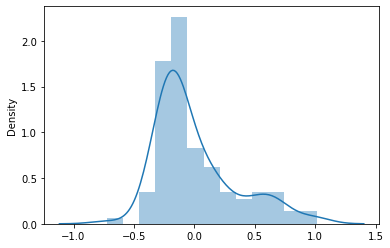

In [53]:
residual = y_train - y_train_pred
sns.distplot(residual)

Text(0.5, 1.0, 'Test(Blue) vs pred(Red)')

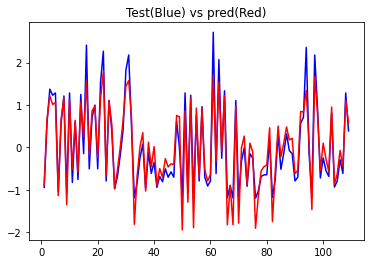

In [54]:
#plotting y_train and y_train_pred
c = [i for i in range(1,110,1)]
plt.plot(c, y_train,color = 'Blue')
plt.plot(c, y_train_pred,color = 'red')
plt.title('Test(Blue) vs pred(Red)')

In [55]:
# treating test columns same way as train dataset
df_test[scaling_columns] = scaler.transform(df_test[scaling_columns])
df_test.describe()

D:\Anaconda\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,Weight,Vertical_Len,Diagonal_Len,Cross_Len,Height,Width
count,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
mean,0.406783,0.146506,0.145529,0.129990,0.174519,0.291103
std,1.386265,1.153926,1.163420,1.156686,1.179970,1.383755
min,-1.220680,-1.839380,-1.890765,-1.903040,-1.714780,-2.172324
25%,-0.800043,-0.716576,-0.696862,-0.724230,-0.602990,-0.592772
50%,-0.146713,0.072265,0.066805,0.100938,-0.101342,0.060053
75%,1.750628,1.045361,1.115503,1.098015,0.933590,1.590203
max,3.254181,3.077923,3.078450,2.900614,2.504489,2.645274


In [56]:
y_test = df_test['Weight']
X_test = df_test.iloc[:,2:7]

In [57]:
cols = X3.columns
cols

Index(['Vertical_Len', 'Height', 'Width'], dtype='object')

In [59]:
# considering only those columns which was part of our model 3.
X_test = X_test[cols]
X_test.columns

Index(['Vertical_Len', 'Height', 'Width'], dtype='object')

In [60]:
#predicting
X_test_sm = sm.add_constant(X_test)
y_pred = model3.predict(X_test_sm)

In [61]:
y_pred.head()

45    -0.437544
11     0.651100
122    1.287522
15     0.933728
127    1.794807
dtype: float64

In [62]:
r_square = r2_score(y_test,y_pred)
r_square

0.8839914021264155

Text(0.5, 1.0, 'Test(Blue) vs pred(Red)')

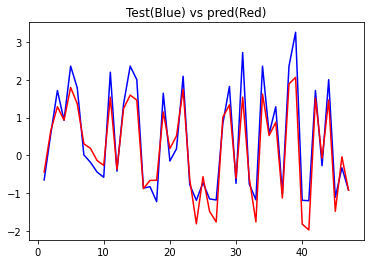

In [63]:
#plotting y_test and y_pred
c = [i for i in range(1,48,1)]
plt.plot(c, y_test,color = 'Blue')
plt.plot(c, y_pred,color = 'red')
plt.title('Test(Blue) vs pred(Red)')

In [27]:
#Searching for zero

print(df1.eq(0).sum())

Species         0
Weight          1
Vertical_Len    0
Diagonal_Len    0
Cross_Len       0
Height          0
Width           0
dtype: int64


In [28]:
df1.drop(df1[df1["Weight"] == 0].index, inplace=True)

In [29]:
df1_train.shape

NameError: name 'df1_train' is not defined

In [62]:
df1_test.shape

(47, 7)

In [64]:
#Rescaling the data:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [65]:
scaling_columns = ['Weight', 'Vertical_Len','Diagonal_Len','Cross_Len','Height','Width']
df1_train[scaling_columns] = scaler.fit_transform(df1_train[scaling_columns])
df1_train.describe()

D:\Anaconda\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,Weight,Vertical_Len,Diagonal_Len,Cross_Len,Height,Width
count,1.080000e+02,1.080000e+02,1.080000e+02,1.080000e+02,1.080000e+02,1.080000e+02
mean,-1.223301e-16,-2.091948e-16,2.467162e-17,-4.368933e-17,-1.315820e-16,-1.464878e-16
std,1.004662e+00,1.004662e+00,1.004662e+00,1.004662e+00,1.004662e+00,1.004662e+00
min,-1.146451e+00,-1.923430e+00,-1.913646e+00,-1.968039e+00,-1.669202e+00,-1.966828e+00
25%,-7.558229e-01,-6.605977e-01,-6.321030e-01,-6.671714e-01,-6.634724e-01,-5.257786e-01
50%,-3.244548e-01,-1.170306e-01,-1.128349e-01,-8.563461e-02,-2.656249e-01,-4.304600e-02
75%,6.153113e-01,7.038106e-01,7.185056e-01,8.181997e-01,7.399908e-01,6.058569e-01
max,3.112795e+00,2.963183e+00,2.956730e+00,2.787017e+00,2.400195e+00,2.314089e+00


In [66]:
y_train = df1_train['Weight']
X_train = df1_train.iloc[:,2:7]

In [67]:
X_train.head()

,Vertical_Len,Diagonal_Len,Cross_Len,Height,Width
6,0.195932,0.265745,0.432844,1.327691,0.692991
25,0.744990,0.808035,1.030729,1.852522,1.191905
21,0.701065,0.705716,0.871916,1.764332,0.752176
52,-0.111540,-0.112835,-0.062280,0.051368,0.189570
97,-0.331163,-0.317473,-0.407932,-0.550798,-0.243075


In [69]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

X_train_sm = sm.add_constant(X_train)
model1 = sm.OLS(y_train,X_train_sm).fit()

D:\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [70]:
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     170.8
Date:                Mon, 26 Sep 2022   Prob (F-statistic):           6.60e-48
Time:                        01:07:12   Log-Likelihood:                -32.412
No. Observations:                 108   AIC:                             76.82
Df Residuals:                     102   BIC:                             92.92
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.665e-16      0.032  -5.15e-15   

In [71]:
VIF = pd.DataFrame()
VIF['Features'] = X_train.columns
VIF['vif'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
VIF['vif'] = round(VIF['vif'] ,2)
VIF = VIF.sort_values(by='vif',ascending = False)
VIF

,Features,vif
1,Diagonal_Len,1620.42
0,Vertical_Len,1300.37
2,Cross_Len,339.31
3,Height,12.78
4,Width,10.05


In [72]:
X2 = X_train.drop(['Diagonal_Len'], axis =1)
X2_sm = sm.add_constant(X2)

model2 = sm.OLS(y_train,X2_sm).fit()

D:\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [73]:
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     211.3
Date:                Mon, 26 Sep 2022   Prob (F-statistic):           1.06e-48
Time:                        01:08:50   Log-Likelihood:                -33.382
No. Observations:                 108   AIC:                             76.76
Df Residuals:                     103   BIC:                             90.18
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.665e-16      0.032  -5.13e-15   

In [74]:
#vif
VIF = pd.DataFrame()
VIF['Features'] = X2.columns
VIF['vif'] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
VIF['vif'] = round(VIF['vif'] ,2)
VIF = VIF.sort_values(by='vif',ascending = False)
VIF

,Features,vif
1,Cross_Len,284.24
0,Vertical_Len,258.35
2,Height,12.62
3,Width,9.10


In [76]:
X3 = X2.drop(['Cross_Len'], axis =1)
X3_sm = sm.add_constant(X3)

model3 = sm.OLS(y_train,X3_sm).fit()

D:\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [77]:

print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     271.1
Date:                Mon, 26 Sep 2022   Prob (F-statistic):           5.28e-49
Time:                        01:09:43   Log-Likelihood:                -35.683
No. Observations:                 108   AIC:                             79.37
Df Residuals:                     104   BIC:                             90.10
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.665e-16      0.033  -5.04e-15   

In [78]:
#vif
VIF = pd.DataFrame()
VIF['Features'] = X3.columns
VIF['vif'] = [variance_inflation_factor(X3.values, i) for i in range(X3.shape[1])]
VIF['vif'] = round(VIF['vif'] ,2)
VIF = VIF.sort_values(by='vif',ascending = False)
VIF

,Features,vif
2,Width,7.11
0,Vertical_Len,4.32
1,Height,2.91


In [79]:
X3

,Vertical_Len,Height,Width
6,0.195932,1.327691,0.692991
25,0.744990,1.852522,1.191905
21,0.701065,1.764332,0.752176
52,-0.111540,0.051368,0.189570
97,-0.331163,-0.550798,-0.243075
...,...,...,...
88,-0.550786,-0.614582,-0.436278
104,0.042196,-0.387945,0.085369
68,-0.572749,0.258268,-0.673208
24,0.755971,1.823759,0.892956


In [80]:
X3.corr()

,Vertical_Len,Height,Width
Vertical_Len,1.000000,0.642116,0.871459
Height,0.642116,1.000000,0.801796
Width,0.871459,0.801796,1.000000


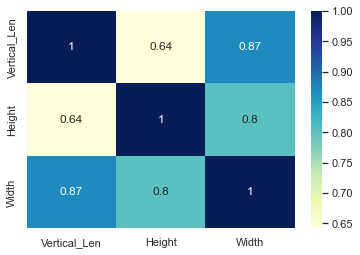

In [81]:
sns.heatmap(X3.corr(), annot=True, cmap='YlGnBu');

In [ ]:
# Residual Analysis

y_train_pred = model3.predict(X3_sm)
y_train_pred.head()

In [59]:
df1_train, df1_test = train_test_split(df1, train_size = 0.7, test_size = 0.3, random_state =100)

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [53]:
print('How many samples do we have in our test and train datasets?')
print('X_train: ', np.shape(X_train))
print('y_train: ', np.shape(y_train))
print('X_test: ', np.shape(X_test))
print('y_test: ', np.shape(y_test))

How many samples do we have in our test and train datasets?
X_train:  (124, 5)
y_train:  (124,)
X_test:  (32, 5)
y_test:  (32,)


In [54]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [55]:
# My model's parameters:
print('Model intercept: ', reg.intercept_)
print('Model coefficients: ', reg.coef_)

Model intercept:  -441.00887253881706
Model coefficients:  [ 89.93843031 -32.68619524 -37.53063323  33.07275974  60.72005923]


In [56]:
print('y = ' + str('%.2f' % reg.intercept_) + ' + ' + str('%.2f' % reg.coef_[0]) + '*X1 ' + str('%.2f' % reg.coef_[1]) + '*X2 ' +
      str('%.2f' % reg.coef_[2]) + '*X3 + ' + str('%.2f' % reg.coef_[3]) + '*X4 + ' + str('%.2f' % reg.coef_[4]) + '*X5')

y = -441.01 + 89.94*X1 -32.69*X2 -37.53*X3 + 33.07*X4 + 60.72*X5


In [82]:
df1 = pd.get_dummies(df1, columns=["Species"])
df1.head()

,Weight,Vertical_Len,Diagonal_Len,Cross_Len,Height,Width,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,242.0,23.2,25.4,30.0,11.5200,4.0200,1,0,0,0,0,0,0
1,290.0,24.0,26.3,31.2,12.4800,4.3056,1,0,0,0,0,0,0
2,340.0,23.9,26.5,31.1,12.3778,4.6961,1,0,0,0,0,0,0
3,363.0,26.3,29.0,33.5,12.7300,4.4555,1,0,0,0,0,0,0
4,430.0,26.5,29.0,34.0,12.4440,5.1340,1,0,0,0,0,0,0


In [83]:
df["Area"] = df["Width"]*df["Height"]

In [84]:
df

,Species,Weight,Vertical_Len,Diagonal_Len,Cross_Len,Height,Width,Area
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200,46.310400
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056,53.733888
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961,58.127387
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555,56.718515
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340,63.887496
...,...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936,2.913181
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690,3.083670
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558,2.859457
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672,5.938652


In [87]:
df = df.drop(["Diagonal_Len","Cross_Len","Height","Width"], axis=1)

KeyError: "['Diagonal_Len' 'Cross_Len' 'Height'] not found in axis"

In [86]:
df

,Species,Width,Area
0,Bream,4.0200,46.310400
1,Bream,4.3056,53.733888
2,Bream,4.6961,58.127387
3,Bream,4.4555,56.718515
4,Bream,5.1340,63.887496
...,...,...,...
154,Smelt,1.3936,2.913181
155,Smelt,1.2690,3.083670
156,Smelt,1.2558,2.859457
157,Smelt,2.0672,5.938652
